# Student Performance Analysis
Dataset:[Student Performance Dataset](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.
|               Feature                |     Data Type     |     Descriptions     |
|--------------------------------------|-------------------|----------------------|
|Hours_Studied                         |       Int         | Number of Hours spend studying per week |
|Attedance                             |       Int         | Percentage of classes attended |
|Parental_involvement                  |      String       | Level of parental involvement in the student's education (Low, Medium, High). |
|Access_to_Resources                   |      String       | Availability of educational resources (Low, Medium, High). |
| Extracurricular_Activities           |      String       |Participation in extracurricular activities (Yes, No). |
|Sleep_Hours                           |       Int         | Average number of hours of sleep per night |
|Previous_Scores                       |       Int         |Scores from previous  exams. |
| Motivation_Level                     |      String       | Student's level of motivation (Low, Medium, High). |
| Internet_Access                      |      String       | Availability of internet access (Yes, No). |
| Tutoring_Sessions                    |       Int         | Number of tutoring sessions attended per month |
| Family_Income                        |      String       | 	Family income level (Low, Medium, High). |
| Teacher_Quality                      |      String       | Quality of the teachers (Low, Medium, High). |
|School_Type                           |      String       | Type of school attended (Public, Private). |
| Peer_Influence                       |      String       | Influence of peers on academic performance (Positive, Neutral, Negative). |
| Physical_Activity                    |       Int         | Average number of hours of physical activity per week. |
| Learning_Disabilities                |      String       | Presence of learning disabilities (Yes, No). |
| Parental_Education_Level             |      String       | Highest education level of parents (High School, College, Postgraduate). |
| Distance_from_Home                   |      String       | Distance from home to school (Near, Moderate, Far). |
| Gender                               |      String       | Gender of the student (Male, Female). |
| Exam_Score                           |       Int         | Final exam score. |

Purpose :Performing  Exploratory Data Analysis (EDA) to discover insights from the data and identify problems in the data. Processing data to improve the dataset so that it can be used to tain machine learning to predict Exam Score base features in the dataset

# Preparation

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore', category=FutureWarning)

## Import Dataset

In [2]:
Student_df=pd.read_csv('./Dataset/StudentPerformanceFactors.csv')
Student_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Data Understanding

In [3]:
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
Student_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
for col in Student_df.select_dtypes(include=['object']).columns:
    print(f"\n======{col}======")
    print(Student_df[col].value_counts())


======Parental_Involvement======
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

======Access_to_Resources======
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

======Extracurricular_Activities======
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

======Motivation_Level======
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

======Internet_Access======
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

======Family_Income======
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

======Teacher_Quality======
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

======School_Type======
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

======Peer_Influence======
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Nam

In [6]:
Student_df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
Student_df.duplicated().sum()

0

In [8]:
row, col=Student_df.shape
print('Number of Row:',row)
print('Number of Col:', col)

Number of Row: 6607
Number of Col: 20


### Identification of Outlier

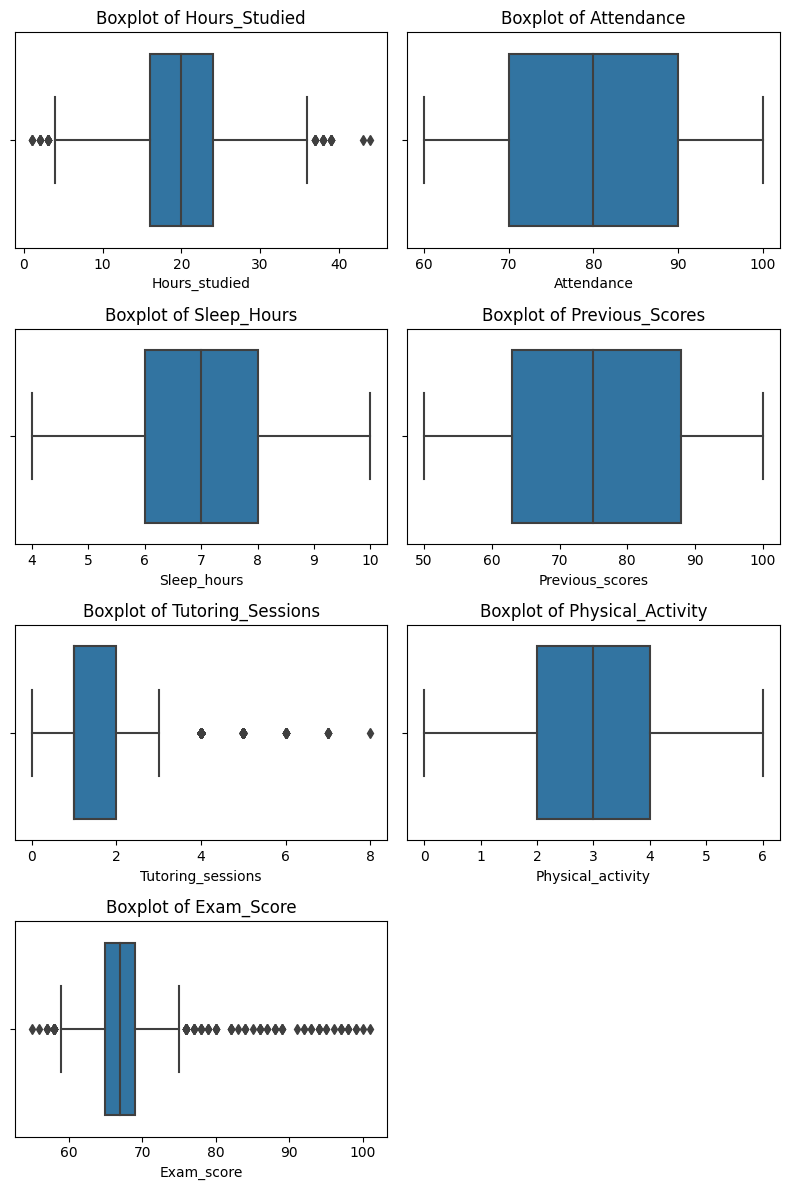

In [9]:
num_cols=Student_df.select_dtypes(include=['number']).columns
fig, axes=plt.subplots(4,2, figsize=(8,12))
axes=axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=Student_df, x=col, ax=axes[i])
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_title(f'Boxplot of {col}')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

# Data Cleaning

## Drop Missing Value

In [10]:
Student_df=Student_df.dropna()
Student_df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## Fix irrelevant Data

In [11]:
Student_df.loc[Student_df['Exam_Score']>100, 'Exam_Score']=100

# EDA (Exploratory Data Analysis)

## Univariate Analysis

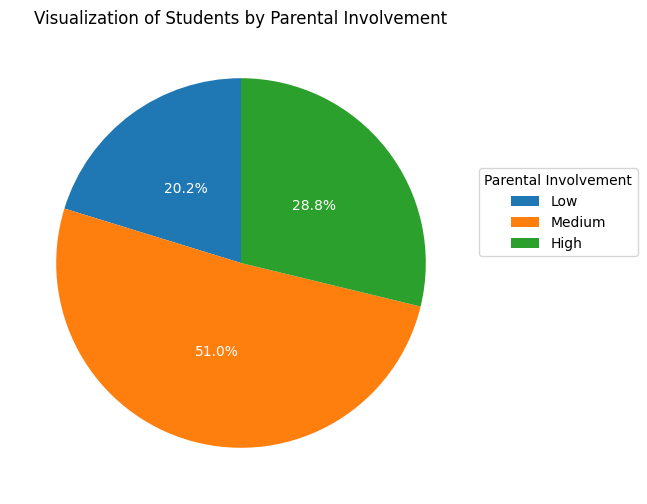

In [12]:
count_parental=Student_df['Parental_Involvement'].value_counts()
count_parental=count_parental.reindex(['Low','Medium','High'])
plt.figure(figsize=(6,6))
wedges, autotexts, texts=plt.pie(
    count_parental.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Students by Parental Involvement')
plt.legend(wedges, count_parental.index, title='Parental Involvement', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

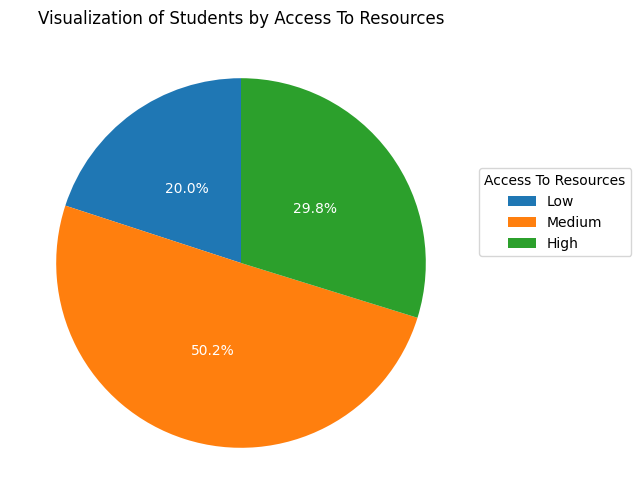

In [13]:
count_access=Student_df['Access_to_Resources'].value_counts()
count_access=count_access.reindex(['Low','Medium','High'])
plt.figure(figsize=(6,6))
wedges, autotextx, texts=plt.pie(
    count_access.values,
    autopct='%1.1f%%',
    pctdistance=0.5,
    startangle=90,
    textprops={'color':'white'}
)
plt.title('Visualization of Students by Access To Resources')
plt.legend(wedges, count_access.index, title='Access To Resources', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

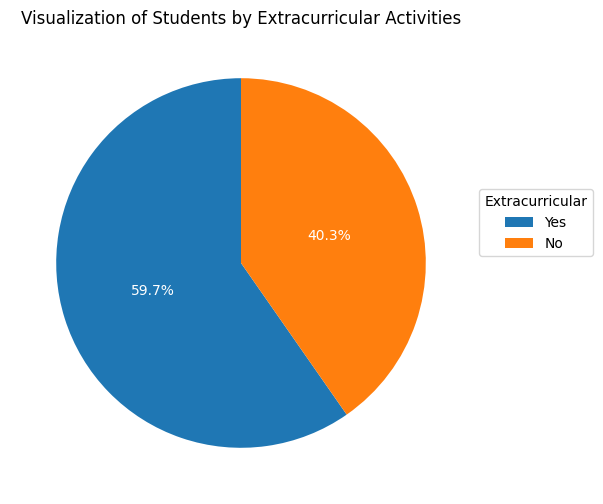

In [14]:
count_extra_activity=Student_df['Extracurricular_Activities'].value_counts()
plt.figure(figsize=(6,6))
wedges, autotexts, texts=plt.pie(
    count_extra_activity.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Students by Extracurricular Activities')
plt.legend(wedges, count_extra_activity.index, title='Extracurricular', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

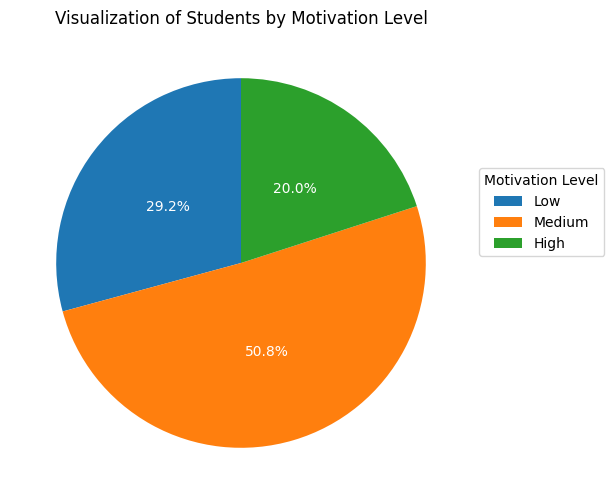

In [15]:
count_motivation=Student_df['Motivation_Level'].value_counts()
count_motivation=count_motivation.reindex(['Low','Medium','High'])
plt.figure(figsize=(6,6))
wedges, autotextx, texts=plt.pie(
    count_motivation.values,
    autopct='%1.1f%%',
    pctdistance=0.5,
    startangle=90,
    textprops={'color':'white'}
)
plt.title('Visualization of Students by Motivation Level')
plt.legend(wedges, count_motivation.index, title='Motivation Level', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

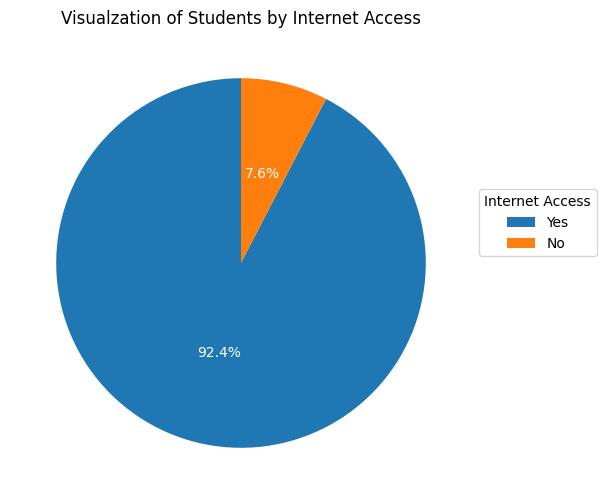

In [16]:
count_internet=Student_df['Internet_Access'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_internet.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualzation of Students by Internet Access')
plt.legend(wedges, count_internet.index, title='Internet Access', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

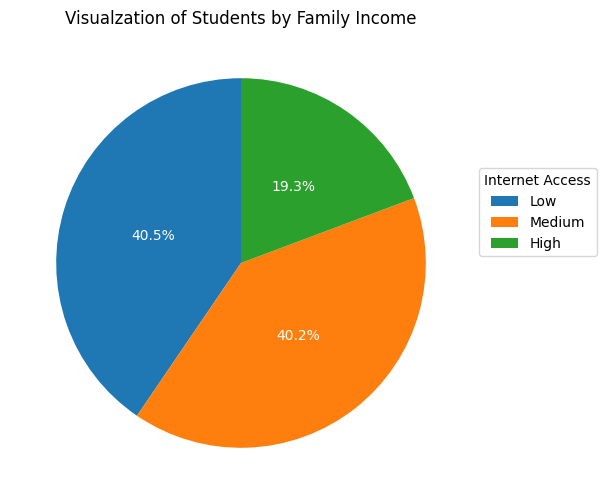

In [17]:
count_internet=Student_df['Family_Income'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_internet.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualzation of Students by Family Income')
plt.legend(wedges, count_internet.index, title='Internet Access', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

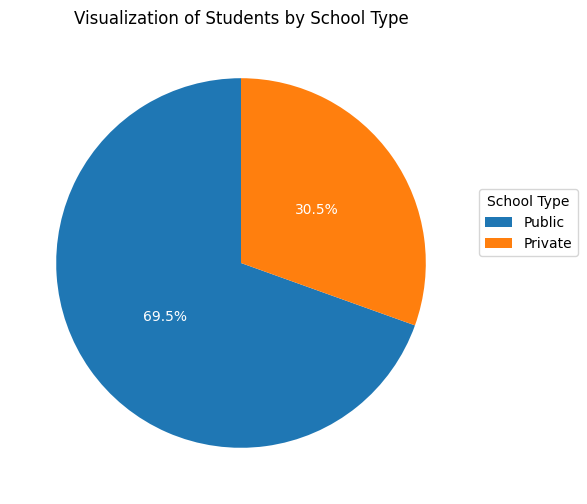

In [18]:
count_school_type=Student_df['School_Type'].value_counts()
plt.figure(figsize=(6,6))
wedges, autotexts, texts=plt.pie(
    count_school_type.values,
    autopct='%1.1f%%',
    pctdistance=0.5,
    startangle=90,
    textprops={'color':'white'}
)
plt.title('Visualization of Students by School Type')
plt.legend(wedges, count_school_type.index, title='School Type', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

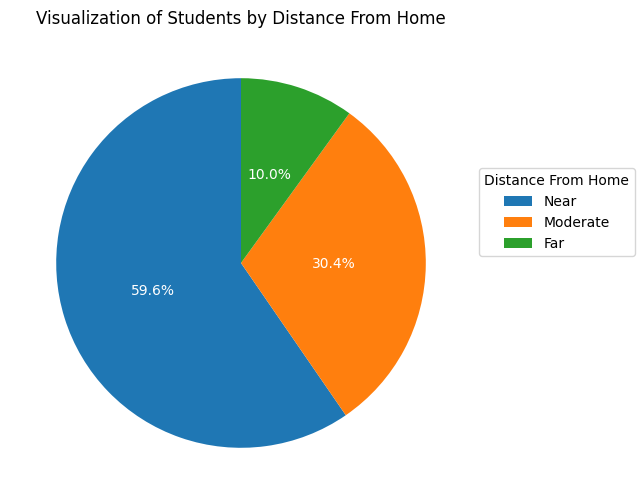

In [19]:
count_distance=Student_df['Distance_from_Home'].value_counts()
plt.figure(figsize=(8,6))
wedges, autotextx, textx=plt.pie(
    count_distance.values,
    autopct='%1.1f%%',
    pctdistance=0.5,
    startangle=90,
    textprops={'color':'white'}
)
plt.title('Visualization of Students by Distance From Home')
plt.legend(wedges, count_distance.index, title='Distance From Home', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

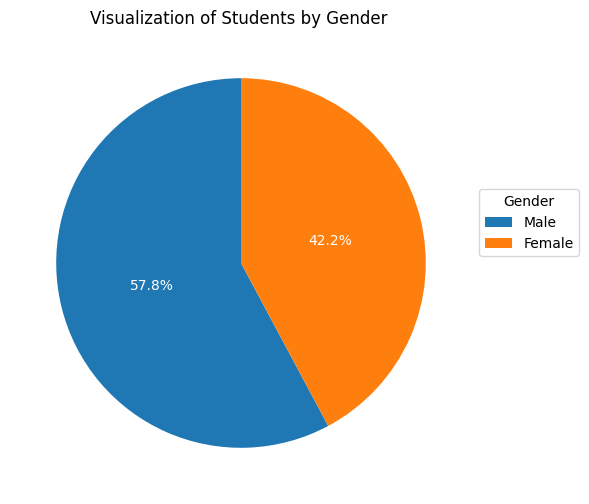

In [20]:
count_gender=Student_df['Gender'].value_counts()
plt.figure(figsize=(6,6))
wedges, autotextx, texts=plt.pie(
    count_gender.values,
    autopct='%1.1f%%',
    pctdistance=0.5,
    startangle=90,
    textprops={'color':'white'}
)
plt.title('Visualization of Students by Gender ')
plt.legend(wedges, count_gender.index, title='Gender', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

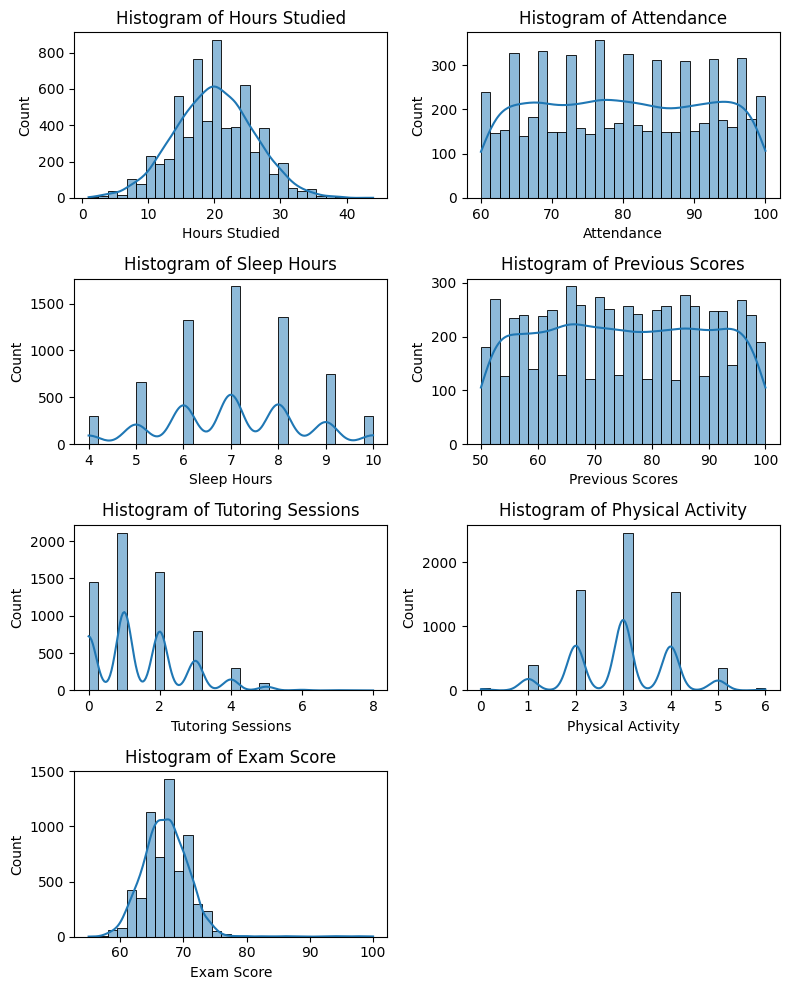

In [21]:
num_cols=Student_df.select_dtypes(include=['number']).columns
fig, axes=plt.subplots(4,2, figsize=(8,10))
axes=axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(Student_df[col], bins=30, kde=True, edgecolor='black',ax=axes[i])
    axes[i].set_xlabel(col.replace('_',' '))
    axes[i].set_title(f'Histogram of {col.replace("_"," ")}')
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

## Bivariate Analysis

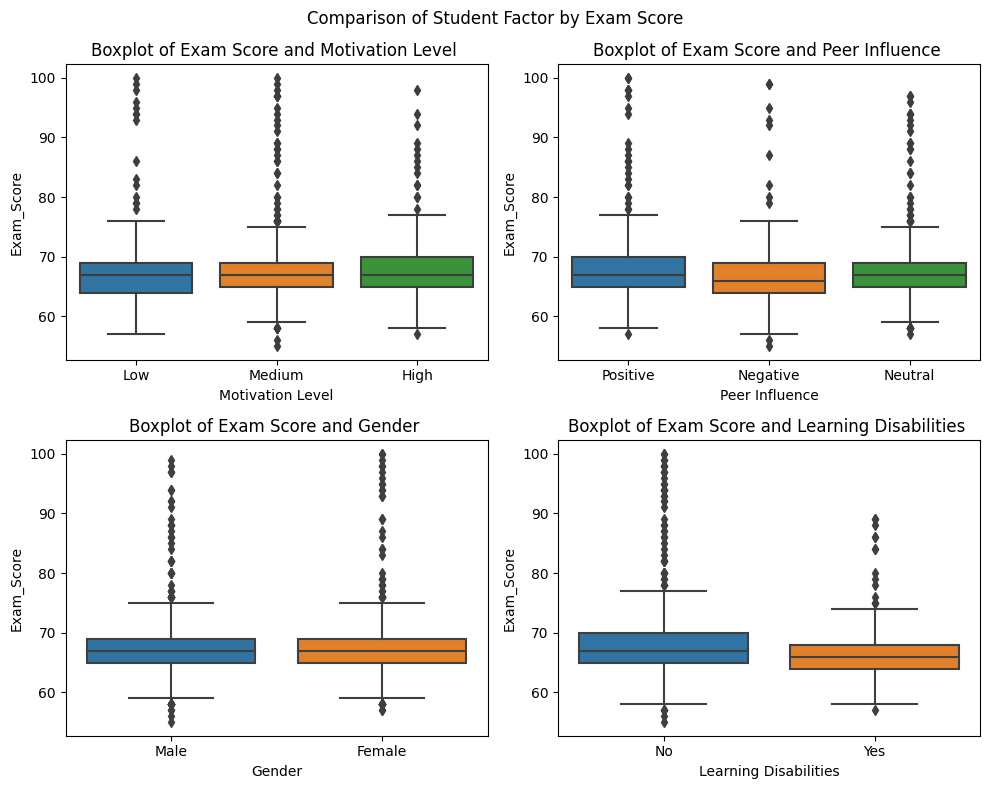

In [22]:
student_factor=['Motivation_Level','Peer_Influence','Gender','Learning_Disabilities']
fig, axes=plt.subplots(2,2, figsize=(10,8))
axes=axes.flatten()
plt.suptitle('Comparison of Student Factor by Exam Score')
for i, col in enumerate(student_factor):
    sns.boxplot(data=Student_df, x=col, y='Exam_Score', ax=axes[i])
    axes[i].set_xlabel(col.replace("_"," "))
    axes[i].set_title(f'Boxplot of Exam Score and {col.replace("_"," ")} ')

plt.tight_layout()
plt.show()

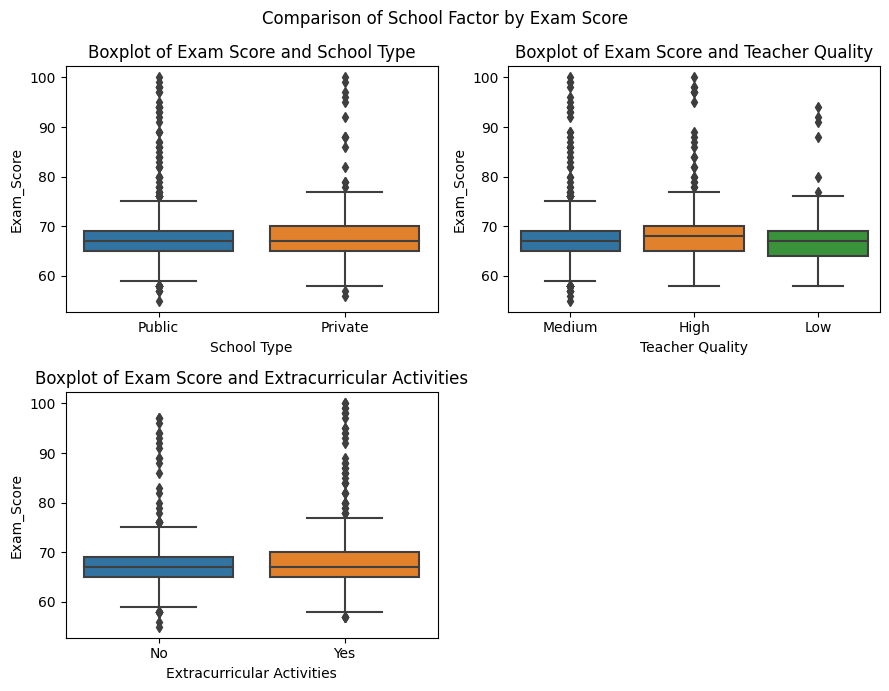

In [23]:
school_factor=['School_Type','Teacher_Quality','Extracurricular_Activities']
fig, axes=plt.subplots(2,2, figsize=(9,7))
axes=axes.flatten()
plt.suptitle('Comparison of School Factor by Exam Score')
for i, col in enumerate(school_factor):
    sns.boxplot(data=Student_df, x=col, y='Exam_Score', ax=axes[i])
    axes[i].set_xlabel(col.replace('_',' '))
    axes[i].set_title(f'Boxplot of Exam Score and {col.replace("_"," ")}')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

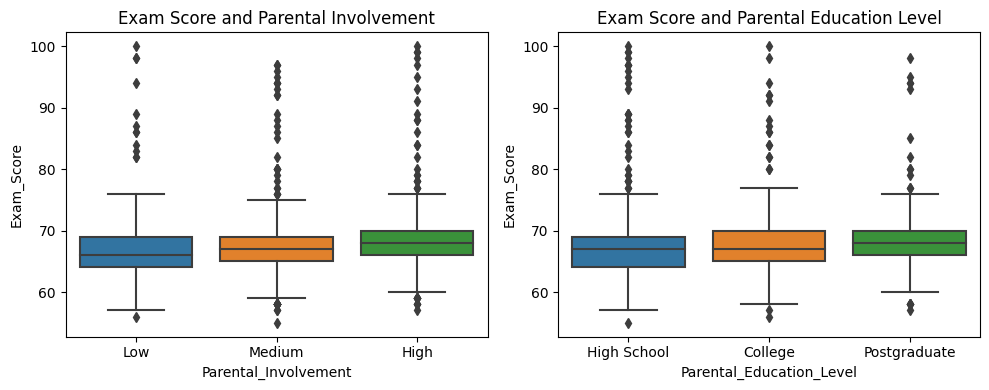

In [24]:
parent_factor=['Parental_Involvement','Parental_Education_Level']
fig, axes=plt.subplots(1,2, figsize=(10,4))
axes=axes.flatten()

for i, col in enumerate(parent_factor):
    sns.boxplot(data=Student_df, x=col, y='Exam_Score', ax=axes[i])
    axes[i].set_title(f'Exam Score and {col.replace("_"," ")}')

plt.tight_layout()
plt.show()

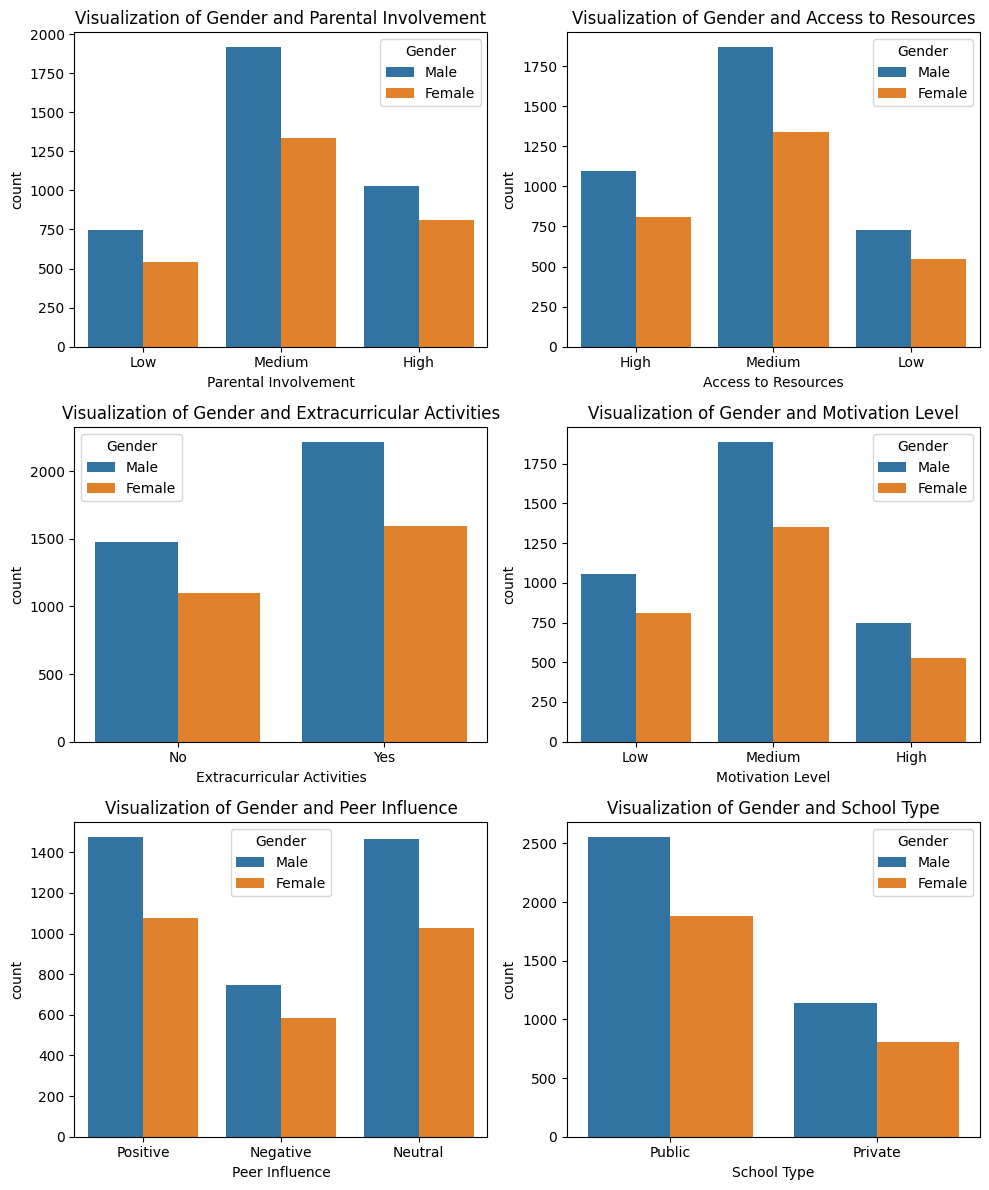

In [25]:
Student_Factor=['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Peer_Influence','School_Type']
fig, axes=plt.subplots(3,2, figsize=(10,12))
axes=axes.flatten()
for i, col in enumerate(Student_Factor):
    sns.countplot(data=Student_df, x=col, hue='Gender', ax=axes[i])
    axes[i].set_title(f'Visualization of Gender and {col.replace("_"," ")}')
    axes[i].set_xlabel(col.replace("_"," "))
plt.tight_layout()
plt.show()

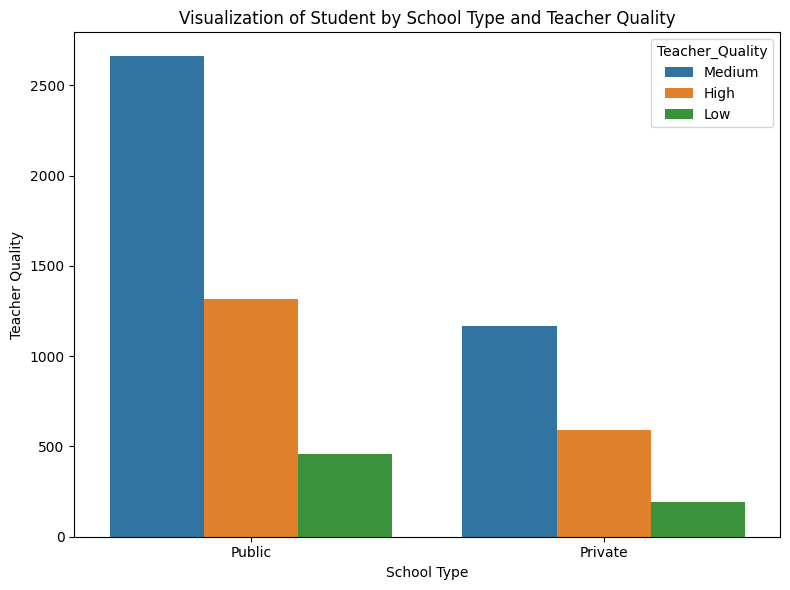

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data=Student_df, x='School_Type',hue='Teacher_Quality')
plt.xlabel('School Type')
plt.ylabel('Teacher Quality')
plt.title('Visualization of Student by School Type and Teacher Quality')
plt.tight_layout()
plt.show()

## Multivariate Analysis

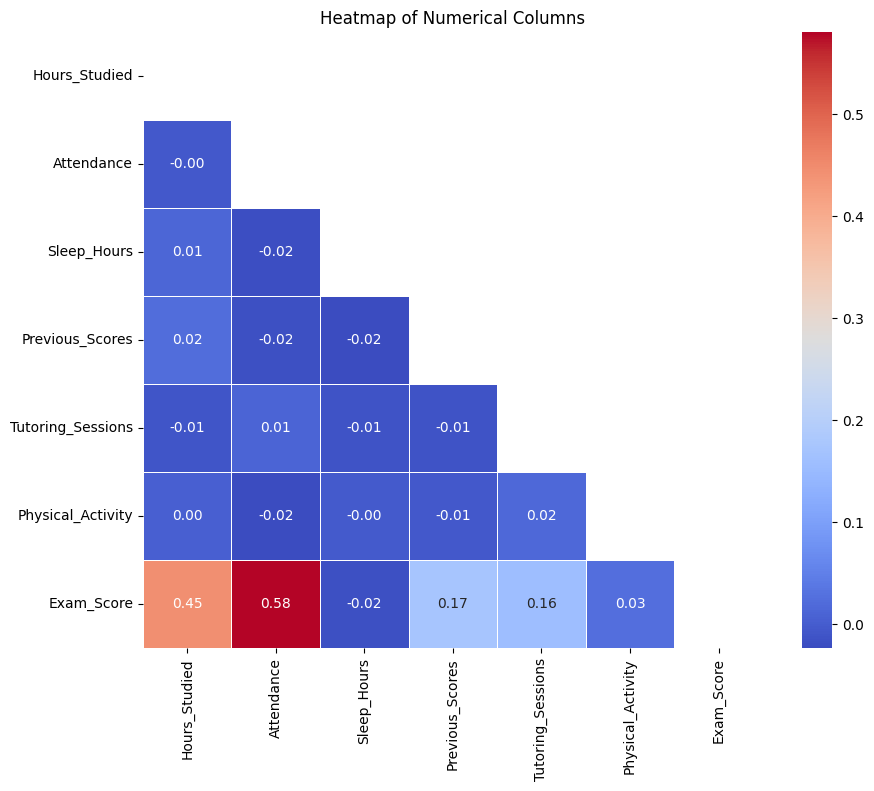

In [27]:
num_cols=Student_df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']]
corr_num=num_cols.corr()
mask=np.triu(np.ones_like(corr_num, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_num, annot=True, cmap='coolwarm',linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

# Data Preprocessing

## Encoding

In [28]:
Parent_invol_encode={
    'Low':0.,
    'Medium':1,
    'High':2
}
Access_encode={
    'Low':0,
    'Medium':1,
    'High':2
}
Motivation_encode={
    'Low':0,
    'Medium':1,
    'High':2,
}
Family_income_encode={
    'Low':0,
    'Medium':1,
    'High':2
}
Teacher_quality_encode={
    'Low':0,
    'Medium':1,
    'High':2
}
Peer_encode={
    'Negative':0,
    'Neutral':1,
    'Positive':2
}
Distance_encode={
    'Near':0,
    'Moderate':1,
    'Far':2
}
extracurrical_encode={
    'No':0,
    'Yes':1
}
Internet_encode={
    'No':0,
    'Yes':1
}
School_encode={
    'Public':0,
    'Private':1
}
Disability_encode={
    'No':0,
    'Yes':1
}
Parental_education_encode={
    'High School':0,
    'College':1,
    'Postgraduate':2
}
gender_encode={
    'Male':0,
    'Female':1
}


In [29]:
Student_df['Parental_Involvement']=Student_df['Parental_Involvement'].map(Parent_invol_encode)
Student_df['Access_to_Resources']=Student_df['Access_to_Resources'].map(Access_encode)
Student_df['Motivation_Level']=Student_df['Motivation_Level'].map(Motivation_encode)
Student_df['Family_Income']=Student_df['Family_Income'].map(Family_income_encode)
Student_df['Teacher_Quality']=Student_df['Teacher_Quality'].map(Teacher_quality_encode)
Student_df['Peer_Influence']=Student_df['Peer_Influence'].map(Peer_encode)
Student_df['Distance_from_Home']=Student_df['Distance_from_Home'].map(Distance_encode)
Student_df['Extracurricular_Activities']=Student_df['Extracurricular_Activities'].map(extracurrical_encode)
Student_df['Internet_Access']=Student_df['Internet_Access'].map(Internet_encode)
Student_df['School_Type']=Student_df['School_Type'].map(School_encode)
Student_df['Learning_Disabilities']=Student_df['Learning_Disabilities'].map(Disability_encode)
Student_df['Parental_Education_Level']=Student_df['Parental_Education_Level'].map(Parental_education_encode)
Student_df['Gender']=Student_df['Gender'].map(gender_encode)

## Normalization

In [30]:
cols_to_scale=['Hours_Studied','Attendance','Previous_Scores']
scaler=StandardScaler()
scaler.fit(Student_df[cols_to_scale])
Student_df[cols_to_scale]=scaler.transform(Student_df[cols_to_scale])

## Split Training Data and Test Data

In [31]:
X=Student_df.drop(columns=['Exam_Score'], axis=1)
y=Student_df['Exam_Score']

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(f'Training Data Shape= X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Test Data Shape= X_test: {X_test.shape}, y_test:{y_test.shape}')

Training Data Shape= X_train: (5102, 19), y_train: (5102,)
Test Data Shape= X_test: (1276, 19), y_test:(1276,)


# Modeling

## Linear Regression

In [33]:
LR=LinearRegression().fit(X_train, y_train)
eval_lr=LR.predict(X_test)

mae_lr=mean_absolute_error(y_test, eval_lr)
mse_lr=mean_squared_error(y_test, eval_lr)
r2_lr=r2_score(y_test, eval_lr)

In [34]:
Result_df=({
    'MAE':[mae_lr],
    'MSE':[mse_lr],
    'R2 Score':[r2_lr]
})
Result_df=pd.DataFrame(Result_df, index=['Linear Regression'])
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741


## Random Forest

In [35]:
RF=RandomForestRegressor().fit(X_train, y_train)
eval_rf=RF.predict(X_test)

mae_rf=mean_absolute_error(y_test, eval_rf)
mse_rf=mean_squared_error(y_test, eval_rf)
r2_rf=r2_score(y_test, eval_rf)

In [36]:
Result_df.loc['Random Forest']=[mae_rf,mse_rf, r2_rf]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274


## Decision Tree

In [37]:
DT=DecisionTreeRegressor().fit(X_train, y_train)
eval_dt=DT.predict(X_test)

mae_dt=mean_absolute_error(y_test, eval_dt)
mse_dt=mean_squared_error(y_test, eval_dt)
r2_dt=r2_score(y_test, eval_dt)

In [38]:
Result_df.loc['Decision Tree']=[mae_dt, mse_dt, r2_dt]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274
Decision Tree,1.884796,15.696708,-0.010128


## SVM 

In [39]:
SVM=SVR().fit(X_train, y_train)
eval_svm=SVM.predict(X_test)

mae_svm=mean_absolute_error(y_test, eval_svm)
mse_svm=mean_squared_error(y_test, eval_svm)
r2_svm=r2_score(y_test, eval_svm)

In [40]:
Result_df.loc['SVM']=[mae_svm, mse_svm, r2_svm]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274
Decision Tree,1.884796,15.696708,-0.010128
SVM,0.472190,4.191744,0.730249


## Gradient Boosting

In [41]:
GBR=GradientBoostingRegressor().fit(X_train, y_train)
eval_gbr=GBR.predict(X_test)

mae_gbr=mean_absolute_error(y_test, eval_gbr)
mse_gbr=mean_squared_error(y_test, eval_gbr)
r2_gbr=r2_score(y_test, eval_gbr)

In [42]:
Result_df.loc['Gradient Boosting']=[mae_gbr, mse_gbr, r2_gbr]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274
Decision Tree,1.884796,15.696708,-0.010128
SVM,0.472190,4.191744,0.730249
Gradient Boosting,0.824530,4.630725,0.702000


## XGBooost Regressor

In [43]:
XGB=xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
).fit(X_train, y_train)
eval_xgb=XGB.predict(X_test)
mae_xgb=mean_absolute_error(y_test, eval_xgb)
mse_xgb=mean_squared_error(y_test, eval_xgb)
r2_xgb=r2_score(y_test, eval_xgb)

In [44]:
Result_df.loc['XGBoost']=[mae_xgb, mse_xgb, r2_xgb]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274
Decision Tree,1.884796,15.696708,-0.010128
SVM,0.472190,4.191744,0.730249
Gradient Boosting,0.824530,4.630725,0.702000
XGBoost,0.797267,4.780617,0.692354


# Hypertune Parameter

## Random Forest Hypertune Parameter

In [45]:
rf_param={
    'n_estimators':[100,150,200],
    'max_depth':[None, 3,5,7],
    'min_samples_leaf':[3,5,7],
    'min_samples_split':[3,5,7]
}

rf_grid=GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param,
    n_jobs=-1,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=0
)
rf_grid.fit(X_train, y_train)
print("Best Parameters:",rf_grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


## XGBoost Hypertune Parameter

In [46]:
xgb_params={
    'n_estimators':[100,200,500],
    'max_depth':[3,5,7],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.7, 0.8,1],
    'colsample_bytree':[0.7, 0.8,1]
}
xgb_grid=GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=xgb_params,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=3,
    verbose=0
)
xgb_grid.fit(X_train, y_train)
print('Best Parameters:', xgb_grid.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


## Gradient Boosting Hypertune Parameter

In [47]:
gbr_param={
    'n_estimators':[100,200,300],
    'max_depth':[None, 3,5,7],
    'min_samples_leaf':[3,5,7],
    'min_samples_split':[3,5,7],
    'subsample':[0.6, 0.8, 1]
}

gbr_grid=GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gbr_param,
    cv=3,
    verbose=0,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)
gbr_grid.fit(X_train, y_train)
print("Best parameters:",gbr_grid.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 200, 'subsample': 0.6}


## Random Forest (After Hypertune Parameter)

In [48]:
RF1=RandomForestRegressor(max_depth=None, 
                          min_samples_leaf=3, 
                          min_samples_split=3, 
                          n_estimators=200).fit(X_train, y_train)
eval_rf1=RF1.predict(X_test)
mae_rf1=mean_absolute_error(y_test, eval_rf1)
mse_rf1=mean_squared_error(y_test, eval_rf1)
r2_rf1=r2_score(y_test, eval_rf1)


In [49]:
Result_df.loc['Random Forest (After Hypertune Parameter)']=[mae_rf1, mse_rf1, r2_rf1]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274
Decision Tree,1.884796,15.696708,-0.010128
SVM,0.472190,4.191744,0.730249
Gradient Boosting,0.824530,4.630725,0.702000
XGBoost,0.797267,4.780617,0.692354
Random Forest (After Hypertune Parameter),1.063181,5.319099,0.657701


## XGBoost Regressor (After Hypertune Parameter)

In [50]:
XGB1=xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
).fit(X_train, y_train)

eval_xgb1=XGB.predict(X_test)
mae_xgb1=mean_absolute_error(y_test, eval_xgb1)
mse_xgb1=mean_squared_error(y_test, eval_xgb1)
r2_xgb1=r2_score(y_test, eval_xgb1)

In [51]:
Result_df.loc['XGBoost (After Hypertune Parameter)']=[mae_xgb1, mse_xgb1, r2_xgb1]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274
Decision Tree,1.884796,15.696708,-0.010128
SVM,0.472190,4.191744,0.730249
Gradient Boosting,0.824530,4.630725,0.702000
XGBoost,0.797267,4.780617,0.692354
Random Forest (After Hypertune Parameter),1.063181,5.319099,0.657701
XGBoost (After Hypertune Parameter),0.797267,4.780617,0.692354


## Gradient Boosting (After Hypertune Parameter)

In [52]:
GBR1=GradientBoostingRegressor(
    max_depth=3,
    min_samples_leaf=7,
    min_samples_split=3,
    n_estimators=200,
    subsample=0.6
).fit(X_train, y_train)
eval_gbr1=GBR1.predict(X_test)
mae_gbr1=mean_absolute_error(y_test, eval_gbr1)
mse_gbr1=mean_squared_error(y_test, eval_gbr1)
r2_gbr1=r2_score(y_test, eval_gbr1)

In [53]:
Result_df.loc['Gradient Boosting (After Hypertune Parameter)']=[mae_gbr1, mse_gbr1, r2_gbr1]
Result_df

,MAE,MSE,R2 Score
Linear Regression,0.481179,4.153024,0.732741
Random Forest,1.127241,5.791912,0.627274
Decision Tree,1.884796,15.696708,-0.010128
SVM,0.472190,4.191744,0.730249
Gradient Boosting,0.824530,4.630725,0.702000
XGBoost,0.797267,4.780617,0.692354
Random Forest (After Hypertune Parameter),1.063181,5.319099,0.657701
XGBoost (After Hypertune Parameter),0.797267,4.780617,0.692354
Gradient Boosting (After Hypertune Parameter),0.697749,4.531849,0.708363


# Model Testing

In [54]:
def model_implementation(
    Hours_Studied, Attendance,
    Parental_Involvement, Access_to_Resources,
    Extracurricular_Activities, Sleep_Hours,
    Previous_Scores, Motivation_Level,
    Internet_Access, Tutoring_Sessions,
    Family_Income, Teacher_Quality,
    School_Type, Peer_Influence,
    Physical_Activity, Learning_Disabilities,
    Parental_Education_Level,
    Distance_from_Home, Gender
):
    input_df=pd.DataFrame([{
        'Hours_Studied':Hours_Studied,
        'Attendance':Attendance,
        'Parental_Involvement':Parental_Involvement,
        'Access_to_Resources':Access_to_Resources,
        'Extracurricular_Activities':Extracurricular_Activities,
        'Sleep_Hours':Sleep_Hours,
        'Previous_Scores':Previous_Scores,
        'Motivation_Level':Motivation_Level,
        'Internet_Access':Internet_Access,
        'Tutoring_Sessions':Tutoring_Sessions,
        'Family_Income':Family_Income,
        'Teacher_Quality':Teacher_Quality,
        'School_Type':School_Type,
        'Peer_Influence':Peer_Influence,
        'Physical_Activity':Physical_Activity,
        'Learning_Disabilities':Learning_Disabilities,
        'Parental_Education_Level':Parental_Education_Level,
        'Distance_from_Home':Distance_from_Home,
        'Gender':Gender
    }])
    input_df[cols_to_scale]=scaler.transform(input_df[cols_to_scale])
    
    input_df['Parental_Involvement']=input_df['Parental_Involvement'].map(Parent_invol_encode)
    input_df['Access_to_Resources']=input_df['Access_to_Resources'].map(Access_encode)
    input_df['Motivation_Level']=input_df['Motivation_Level'].map(Motivation_encode)
    input_df['Family_Income']=input_df['Family_Income'].map(Family_income_encode)
    input_df['Teacher_Quality']=input_df['Teacher_Quality'].map(Teacher_quality_encode)
    input_df['Peer_Influence']=input_df['Peer_Influence'].map(Peer_encode)
    input_df['Distance_from_Home']=input_df['Distance_from_Home'].map(Distance_encode)
    input_df['Extracurricular_Activities']=input_df['Extracurricular_Activities'].map(extracurrical_encode)
    input_df['Internet_Access']=input_df['Internet_Access'].map(Internet_encode)
    input_df['School_Type']=input_df['School_Type'].map(School_encode)
    input_df['Learning_Disabilities']=input_df['Learning_Disabilities'].map(Disability_encode)
    input_df['Parental_Education_Level']=input_df['Parental_Education_Level'].map(Parental_education_encode)
    input_df['Gender']=input_df['Gender'].map(gender_encode)
    predicted=LR.predict(input_df)
    return predicted[0]

In [55]:
Exam_Score=model_implementation(
    Hours_Studied=20,
    Attendance=89,
    Parental_Involvement='Medium',
    Access_to_Resources='High',
    Extracurricular_Activities='Yes',
    Sleep_Hours=10,
    Previous_Scores=90,
    Motivation_Level='High',
    Internet_Access='Yes',
    Tutoring_Sessions=5,
    Family_Income='Medium',
    Teacher_Quality='High',
    School_Type='Public',
    Physical_Activity=4,
    Peer_Influence='Neutral',
    Learning_Disabilities='No',
    Parental_Education_Level='College',
    Distance_from_Home='Near',
    Gender='Male'
)
print('Exam Score:', Exam_Score)

Exam Score: 74.31192182262212


### Conclusion
-  The best model performing for prediction Exam score based feature in the dataset is Logistic Regression and SVM, indicating that these models have good metrics compared to other algorithms even though the R2 Score Metric is not more than 0.8. However, the MAE and MSE metrics for both algorithms have good values
- After hypertuning the parameters, the metrics of both RF and GBR improved, although the XGBoost metric did not increase